In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn import datasets, manifold

In [3]:
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
pixel_values, targets = data

In [5]:
targets = targets.astype(int)

In [6]:
single_image = pixel_values[1, :].reshape(28,28)

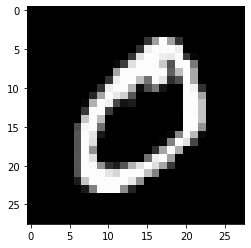

In [7]:
plt.imshow(single_image, cmap='gray')

In [8]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [9]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[: 3000])),
    columns=["x", "y", "targets"]
)

In [10]:
tsne_df.loc[:, 'targets'] = tsne_df.targets.astype(int)

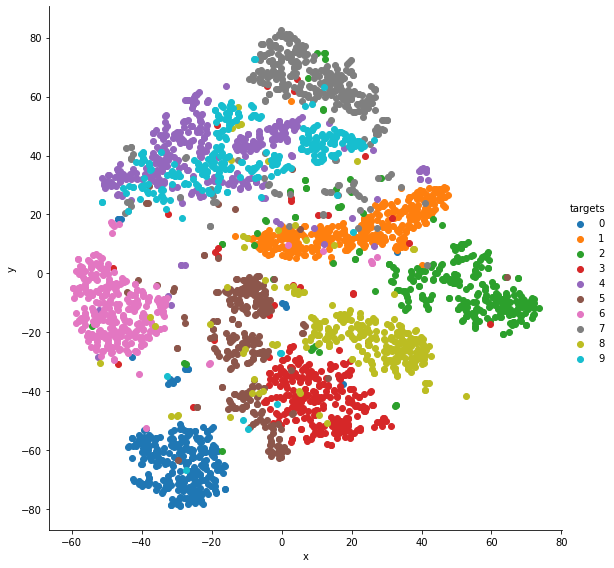

In [11]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()